In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, beta, uniform
#from math import comb
import pymc3 as pm
import arviz as az

# Problem 1

In [ ]:
def bernoulli_sampling(p, n):
    """
    Simulate n tosses of a coin which gives heads with probability 
    p. Then use that sample to calculate the posterior distribution on 
    p given a uniform prior.

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate

    Returns:
        (float): The MAP estimate of p
    """
    # Simulate n tosses of a coin with p probability of heads
    coin_flips = binom.rvs(1, p, size=n)
    g = uniform.rvs(size=n)
    f = binom.pmf(coin_flips, n, p) * g
    sum_f = np.sum(f)

    # Find the MAP
    map = 'MAP: ' + str(np.argmax(f/sum(f)))

    # Plot the posterior distribution
    plt.plot(np.linspace(0,1,n), f/np.sum(f))
    plt.title('Posterior Distribution')
    plt.show()

    return map

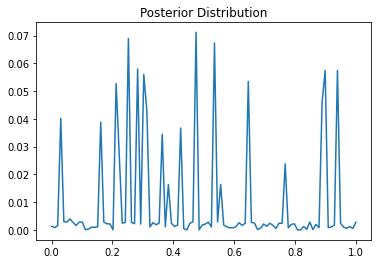

'MAP: 47'

In [ ]:
# Plot posterior and return MAP for p=0.2, n=100
bernoulli_sampling(0.2, 100)

# Problem 2

In [ ]:
def non_uniform_prior(p, n, prior):
    """
    Generate a sample of size n that has a Bernoulli
    distribution with a probability parameter p.
    Use Bayes' theorem to compute the posterior distribution
    for the given prior and the generated sample:
    
        P(t|x) = P(x|t) P(t) / P(x)
    
    Plot both prior and posterior distributions between [0, 1]

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate
        prior (scipy dist): the prior distribution on p

    Returns:
        (float): MAP estimate
    """
    # Simulate n tosses of a coin with p probability of heads
    coin_flips = binom.rvs(1, p, size=n)
    rvs = prior
    dist = np.linspace(0, np.maximum(rv.dist.b, 1.5), n)
    g = rv.pdf(dist)
    f = binom.pmf(coin_flips, n, p) * g
    sum_f = np.sum(f)

    # Find the MAP
    map = 'MAP: ' + str(np.argmax(f/sum(f)))

    # Plot the posterior distribution
    plt.plot(np.linspace(0,1,n), f/np.sum(f))
    plt.title('Posterior Distribution')
    plt.show()

    return map


The distribution for 90% is a bit thinner than it is for 40%. Thus, 90% must give higher confidence.

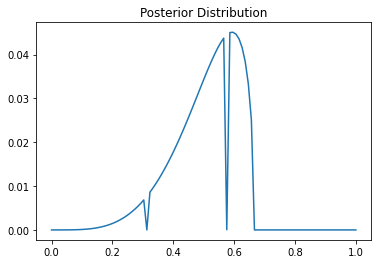

'MAP: 59'

In [ ]:
non_uniform_prior(0.9, 100, beta(5,1.5))

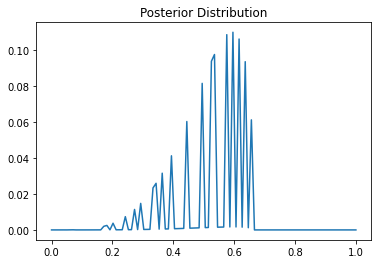

'MAP: 59'

In [ ]:
non_uniform_prior(0.4, 100, beta(5,1.5))

# Problem 3

In [ ]:
def weather_forecast(transition_matrix, days=10):
    """
    Given the above transition matrix and assuming the 0th day is sunny,
    sample from the markov chain to give a possible forecast of the 10 following
    days. 
    """
    # initialize
    states = ['sun', 'rain', 'wind']

    # Randomly start at a state
    s0 = np.random.randint(0,transition_matrix.shape[0])

    # randomly sample from state probabilites for 10 days
    weather = [states[s0]]
    current_state = s0
    for day in range(days-1):
      next_state = np.random.choice(a=states, p=transition_matrix[current_state])
      weather.append(next_state)
      current_state = states.index(next_state)

    return weather

In [ ]:
transition_matrix = np.array(
  [
    [0.6,0.1,0.3],
    [0.2,0.6,0.2],
    [0.3,0.4,0.3]
  ]
)

In [ ]:
weather_forecast(transition_matrix)

['rain', 'rain', 'rain', 'wind', 'rain', 'rain', 'sun', 'sun', 'sun', 'wind']

# Problem 4

In [ ]:
def posterior_sampling(data, n=1000):
    """
    Given data that flips a coin 100 times, assume the data are distributed 
    as Bernoulli(p) for some unknown value of p, where p has a prior of 
    Beta(1,1). Set up a PyMC3 model for this situation and sample from the 
    poterior n times. Print a trace plot. Return the mean for the posterior.
    
    Parameters:
        data (array): The coin flips
        n (int): number of samples to take from the posterior
        
    Returns:
        Mean (float): The average of the coin flips (estimated p)
    """
    # Set up the model using pymc3
    model = pm.Model()
    with model:
      p = pm.Beta('p', alpha=1, beta=1)
      y = pm.Bernoulli('y', p=p, observed=data)
      trace = pm.sample(n)

      # Print the model and return the mean
      az.plot_trace(trace)
      p = trace['p']
      mean = p.mean()

      return mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


0.18216750785311003

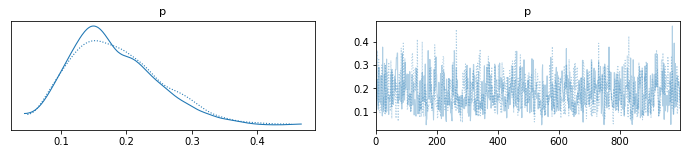

In [ ]:
data = bernoulli.rvs(0.2, size=30)
posterior_sampling(data)

# Problem 5

In [91]:
def height_model(observed_heights,m=180,s=10,alpha=2,beta=10,n=1000):

    """
    Given a dataset of the measured heights of 100 men, assume the data are
    distributed as Normal(mu,1/tau) where mu has a prior of Normal(m,s), and tau has
    a prior of Gamma(alpha,beta). Set up a PyMC3 model for this situation and sample 
    from the poterior n times. Print a trace plot for mu and tau. Return the mean 
    for the posterior of mu.
    
    Parameters:
        observed_heights (array): The measured heights of 100 men
        m (int): the mean in the prior distribution of mu
        s (int): the standard deviation in the prior distribution of mu
        alpha (int): the first component in the prior distibution of tau
        beta (int): the second component in the prior distribution of tau
        n (int): number of samples from the posterior
        
    Returns:
        mu_mean (float): the estimated value of mu
    """
    # Set up the model using pymc3
    model = pm.Model()
    with model:
      mu = pm.Normal('mu', mu=m, sigma=s)
      tau = pm.Gamma('tau', alpha=alpha, beta=beta)
      y = pm.Normal('y', mu=mu, sigma=1/tau, observed=observed_heights)
      trace = pm.sample(n)

      # Plot the trace for mu and tau and return mean of mu
      az.plot_trace(trace, var_names=['mu', 'tau'], divergences=None)
      plt.tight_layout()
      mu = trace['mu']
      tau = trace['tau']
      mu_mean = mu.mean()
      tau_mean = tau.mean()

      return mu_mean
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [tau, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


180.03908990475256

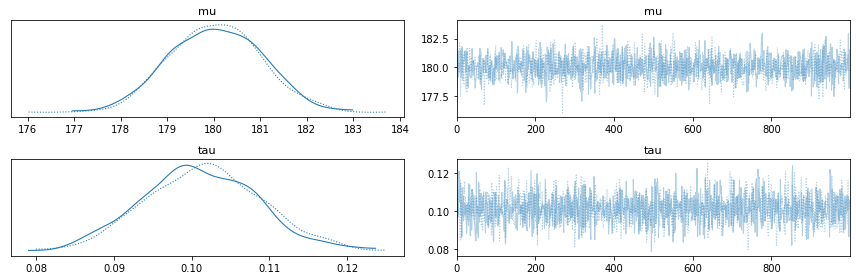

In [92]:
heights = np.random.normal(180,10,100)
height_model(heights)